In [2]:
import pandas as pd
import os 
import matplotlib.pyplot as plt


In [3]:
# Countries we will analyze
countries_list = ["United States","Mexico","Venezuela","Brazil","South Africa","Nigeria","Poland","Sweden","China","South Korea"]




In [40]:
# Productivity dataframe
filepath = os.path.join("Output","productivity.csv")
productivity_df = pd.read_csv(filepath)

productivity_df = productivity_df[productivity_df.Entity.isin(countries_list)]
productivity_df

,Unnamed: 0,Entity,Code,Year,Work hours per persons engaged,Productivity,Unnamed: 5
70,5804,Brazil,BRA,1950.0,2042.0000,2.018346,53975000
71,5805,Brazil,BRA,1951.0,2051.0186,2.013669,55606000
72,5806,Brazil,BRA,1952.0,2060.0771,2.157732,57284000
73,5807,Brazil,BRA,1953.0,2069.1755,2.151867,58999000
74,5808,Brazil,BRA,1954.0,2078.3142,2.262455,60749000
...,...,...,...,...,...,...,...
835,45707,Venezuela,VEN,2015.0,0.0000,0.000000,30082000
836,45708,Venezuela,VEN,2016.0,0.0000,0.000000,29851000
837,45709,Venezuela,VEN,2017.0,0.0000,0.000000,29402000
838,45710,Venezuela,VEN,2018.0,0.0000,0.000000,28887000


In [6]:
# Viewing World Bank Health Systems 
filepath = os.path.join("Data","Health_systems","World_Bank_health_systems.csv")
data_df = pd.read_csv(filepath)
data_df

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,US,Virgin Islands,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN
207,NaN,NaN,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,NaN
208,Zambia,NaN,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN


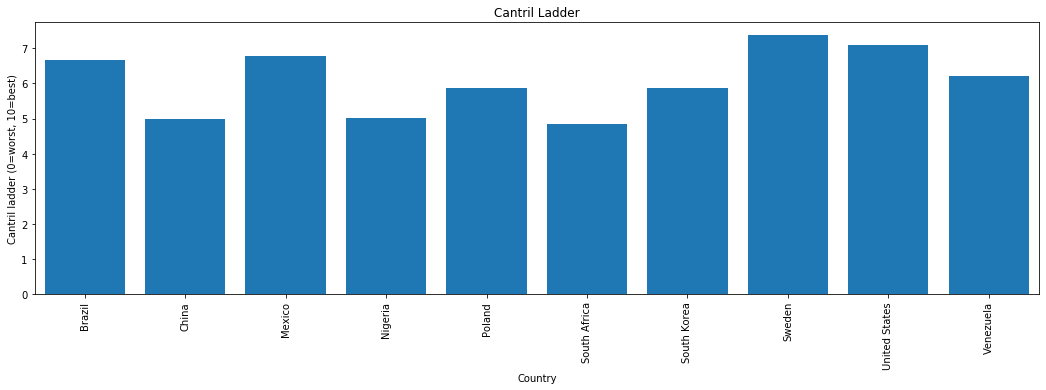

In [26]:
#Obtaining and visualizing Cantril Happiness score average per chosen country
filepath = os.path.join("Data","Life_satisfcation_and_happiness","happiness_cantril_ladder.csv")
data_df = pd.read_csv(filepath)
data_df = data_df.rename(columns={"World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))":"Cantril Ladder(0=worst,10=best)"})

data_df = data_df[data_df.Entity.isin(countries_list)]
data_df = data_df.groupby("Entity").mean().reset_index()
data_df.count()


xlocation = [value for value in data_df["Entity"]]
f, ax = plt.subplots(figsize=(18,5))
plt.bar(data_df["Entity"],data_df["Cantril Ladder(0=worst,10=best)"])
plt.xticks(xlocation,data_df["Entity"],rotation=90)
plt.xlabel("Country")
plt.ylabel("Cantril ladder (0=worst, 10=best)")
plt.title("Cantril Ladder")
plt.xlim(-.5,len(data_df.Entity)-.5)
plt.show()


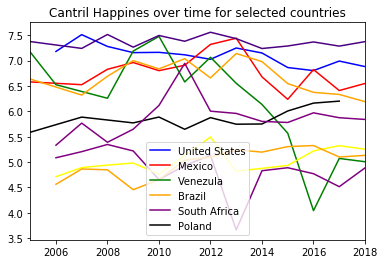

In [59]:
# Obtaining and visualizing Cantril Happiness score over time per chosen country
filepath = os.path.join("Data","Life_satisfcation_and_happiness","happiness_cantril_ladder.csv")
data_df = pd.read_csv(filepath)

data_df = data_df.rename(columns={"World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))":"Cantril Ladder(0=worst,10=best)"})
data_df = data_df[data_df.Entity.isin(countries_list)]
countries_list = [name for name in data_df.Entity.unique()]
years = data_df.Year

# Country data
US_data = data_df.loc[data_df.Entity == "United States"]
Mexico_data = data_df.loc[data_df.Entity == "Mexico"]
Venezuela_data = data_df.loc[data_df.Entity == "Venezuela"]
Brazil_data = data_df.loc[data_df.Entity == "Brazil"]
South_Africa_data = data_df.loc[data_df.Entity == "South Africa"]
Nigeria_data = data_df.loc[data_df.Entity == "Nigeria"]
Poland_data = data_df.loc[data_df.Entity == "Poland"]
Sweden_data = data_df.loc[data_df.Entity == "Sweden"]
China_data = data_df.loc[data_df.Entity == "China"]
South_Korea_data = data_df.loc[data_df.Entity == "South Korea"]

# Country lines
US_line, = plt.plot(US_data.Year, US_data["Cantril Ladder(0=worst,10=best)"], color="blue", label="United States")
Mexico_line, = plt.plot(Mexico_data.Year, Mexico_data["Cantril Ladder(0=worst,10=best)"], color="red", label="Mexico")
Venezuela_line, = plt.plot(Venezuela_data.Year, Venezuela_data["Cantril Ladder(0=worst,10=best)"], color="green", label="Venezula") 
Brazil_line, = plt.plot(Brazil_data.Year, Brazil_data["Cantril Ladder(0=worst,10=best)"], color="orange", label="Brazil") 
South_Africa_line, = plt.plot(South_Africa_data.Year, South_Africa_data["Cantril Ladder(0=worst,10=best)"], color="purple", label="South Africa") 
Nigeria_line, = plt.plot(Nigeria_data.Year, Nigeria_data["Cantril Ladder(0=worst,10=best)"], color="yellow", label="Nigeria") 
Poland_line, = plt.plot(Poland_data.Year, Poland_data["Cantril Ladder(0=worst,10=best)"], color="black", label="Poland") 
Sweden_line, = plt.plot(Sweden_data.Year, Sweden_data["Cantril Ladder(0=worst,10=best)"], color="indigo", label="Sweden") 
China_line, = plt.plot(China_data.Year, China_data["Cantril Ladder(0=worst,10=best)"], color="orange", label="China") 
South_Korea_line, = plt.plot(South_Korea_data.Year, South_Korea_data["Cantril Ladder(0=worst,10=best)"], color="purple", label="South Korea") 


plt.legend(handles=[US_line,Mexico_line,Venezuela_line,Brazil_line,South_Africa_line,Poland_line], loc="best")
plt.xlim(min(years),max(years))
plt.title("Cantril Happines over time for selected countries")
plt.show()


In [58]:
plt.plot?

In [82]:
import bokeh

In [22]:
data_df.Entity.unique()

array(['Brazil', 'China', 'Mexico', 'Nigeria', 'Poland', 'South Africa',
       'South Korea', 'Sweden', 'United States', 'Venezuela'],
      dtype=object)